In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import datetime

#Data

In [11]:
transformed_cifar10 = datasets.CIFAR10(
    '/content/drive/MyDrive/MachineLearning/DeepLearningWithPyTorch/dlwpt-code/data/p1ch7',
    train=True,
    download=False,
    transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                       (0.2470, 0.2435, 0.2616))
    ])
)

cifar10_val = datasets.CIFAR10(
    '/content/drive/MyDrive/MachineLearning/DeepLearningWithPyTorch/dlwpt-code/data/p1ch7',
    train=False,
    download=False,
    transform=transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                       (0.2470, 0.2435, 0.2616))
    ])
)

In [12]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [
          (img, label_map[label])
          for img, label in transformed_cifar10
          if label in [0, 2]
]
cifar2_val = [
          (img, label_map[label])
          for img, label in cifar10_val
          if label in [0, 2]
]

#8.2

In [ ]:
conv = nn.Conv2d(3, 16, kernel_size=3)

conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [ ]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

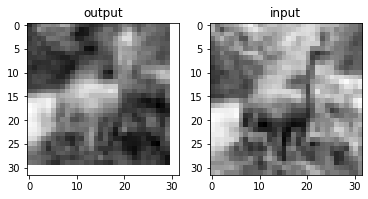

In [ ]:
ax1 = plt.subplot(1, 2 ,1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap='gray')
plt.title('input')
plt.show()

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [ ]:
with torch.no_grad():
    conv.bias.zero_()

with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

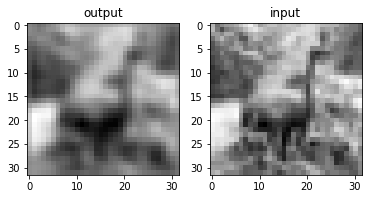

In [ ]:
output = conv(img.unsqueeze(0))
ax1 = plt.subplot(1, 2 ,1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap='gray')
plt.title('input')
plt.show()

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                  [-1.0, 0.0, 1.0],
                                  [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

In [ ]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Linear(8 * 8 * 8, 32),
    nn.Tanh(),
    nn.Linear(32, 2)
)

In [ ]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [ ]:
model(img.unsqueeze(0))

RuntimeError: ignored

#8.3

In [ ]:
class Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act3(self.fc1(out))
        out = self.fc2(out)

        return out

In [ ]:
model = Net()
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [ ]:
class Net(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = torch.nn.functional.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = torch.nn.functional.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)

        return out

In [ ]:
model = Net()
model(img.unsqueeze(0))

tensor([[0.0224, 0.0467]], grad_fn=<AddmmBackward0>)

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train / len(train_loader)))

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)

2022-02-05 16:16:52.687747 Epoch 1, Training loss 0.5696787329236414
2022-02-05 16:17:29.732778 Epoch 10, Training loss 0.3295309826446946
2022-02-05 16:18:07.247938 Epoch 20, Training loss 0.2928412569935914
2022-02-05 16:18:43.761105 Epoch 30, Training loss 0.2704463877305863
2022-02-05 16:19:26.117582 Epoch 40, Training loss 0.24962317858152328
2022-02-05 16:20:06.931200 Epoch 50, Training loss 0.2318040037136169
2022-02-05 16:20:45.639503 Epoch 60, Training loss 0.2131096565514613
2022-02-05 16:21:22.104328 Epoch 70, Training loss 0.20081469933887955
2022-02-05 16:22:08.627506 Epoch 80, Training loss 0.18573990981480118
2022-02-05 16:22:47.843253 Epoch 90, Training loss 0.17040514599555617
2022-02-05 16:23:34.048535 Epoch 100, Training loss 0.15616565366174764


In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=False)

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)

In [ ]:
def validate(model, train_loader, val_loader):
    for name, loader in [('train', train_loader), ('val', val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        
        print('Accuracy {}: {:2f}'.format(name, correct / total))

validate(model, train_loader,val_loader)

Accuracy train: 0.929100
Accuracy val: 0.872500


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/MachineLearning/DeepLearningWithPyTorch/Charpter8' + '/birds_vs_airplanes.pt')

In [ ]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load('/content/drive/MyDrive/MachineLearning/DeepLearningWithPyTorch/Charpter8' + '/birds_vs_airplanes.pt'))

<All keys matched successfully>

In [ ]:
device = (
    torch.device('cuda') if torch.cuda.is_available()
    else torch.device('cpu')
)
print(f'Training on device {device}.')

Training on device cuda.


In [13]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train / len(train_loader)))

In [ ]:
def validate(model, train_loader, val_loader):
    for name, loader in [('train', train_loader), ('val', val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)

                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        
        print('Accuracy {}: {:2f}'.format(name, correct / total))

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net().to(device=device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)

2022-02-05 16:23:47.473287 Epoch 1, Training loss 0.5784632673688755
2022-02-05 16:23:52.717778 Epoch 10, Training loss 0.3329159940124317
2022-02-05 16:23:58.531981 Epoch 20, Training loss 0.2834512968162063
2022-02-05 16:24:05.077523 Epoch 30, Training loss 0.25630349186575335
2022-02-05 16:24:12.480064 Epoch 40, Training loss 0.2377522536998342
2022-02-05 16:24:20.154022 Epoch 50, Training loss 0.2216173980361337
2022-02-05 16:24:27.401965 Epoch 60, Training loss 0.20705063897333328
2022-02-05 16:24:33.916152 Epoch 70, Training loss 0.1947852702941864
2022-02-05 16:24:40.416547 Epoch 80, Training loss 0.18067411731952315
2022-02-05 16:24:47.530341 Epoch 90, Training loss 0.16557557002943793
2022-02-05 16:24:54.874237 Epoch 100, Training loss 0.1496965578359783


In [ ]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load('/content/drive/MyDrive/MachineLearning/DeepLearningWithPyTorch/Charpter8' + '/birds_vs_airplanes.pt',
                                        map_location=device))

<All keys matched successfully>

#8.5

In [ ]:
class NetWidth(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(16 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = torch.nn.functional.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = torch.nn.functimoal.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 16 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)

        return out

In [ ]:
class NetWidth(nn.Module):
    def __init__(self, n_channel):
        super().__init__()
        self.n_channel = n_channel
        self.conv1 = nn.Conv2d(3, self.n_channel, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(self.n_channel, self.n_channel // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear((self.n_channel // 2) * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = torch.nn.functional.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = torch.nn.functimoal.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, (self.n_channel // 2) * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)

        return out

In [ ]:
model = NetWidth().to(device=device)
sum(p.numel() for p in model.parameters())

38386

In [5]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)

            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            loss = loss + l2_lambda * l2_norm

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            loss_train += loss.item()

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(), epoch, loss_train / len(train_loader)))

In [ ]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super.__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * (n_chans1 // 2), 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = torch.nn.functional.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = torch.nn.functimoal.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, (self.n_channel // 2) * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)

        return out

In [ ]:
model.train()

NetWidth(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
model.eval()

NetWidth(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [4]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * (n_chans1 // 2), 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = torch.nn.functional.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = torch.nn.functimoal.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, (self.n_channel // 2) * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)

        return out

In [3]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super.__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * (n_chans1 // 2), 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = torch.nn.functional.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = torch.nn.functimoal.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = torch.nn.functimoal.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, (self.n_channel // 2) * 4 * 4)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)

        return out

In [4]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super.__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * (n_chans1 // 2), 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = torch.nn.functional.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = torch.nn.functimoal.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = torch.nn.functimoal.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, (self.n_channel // 2) * 4 * 4)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)

        return out

In [22]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3, padding=1, bias=False)
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight, nonlinearity='relu')
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)

        return out + x

In [27]:
class NetResDeep(nn.Module):
    def __init__(self, n_blocks, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)])
        )
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = nn.functional.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = nn.functional.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)

        return out

In [28]:
device = (
    torch.device('cuda') if torch.cuda.is_available()
    else torch.device('cpu')
)
print(f'Training on device {device}.')

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = NetResDeep(10).to(device=device)
optimizer = torch.optim.SGD(model.parameters(), lr=3e-3)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs=100,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader
)

Training on device cuda.
2022-02-06 16:58:01.407006 Epoch 1, Training loss 0.49921637242007405
2022-02-06 16:58:38.682320 Epoch 10, Training loss 0.24751524318745183
2022-02-06 16:59:20.063515 Epoch 20, Training loss 0.1681158584868832
2022-02-06 17:00:01.340782 Epoch 30, Training loss 0.11277642936273745
2022-02-06 17:00:42.846864 Epoch 40, Training loss 0.06556965991451293
2022-02-06 17:01:24.365183 Epoch 50, Training loss 0.025265068420843712
2022-02-06 17:02:05.924120 Epoch 60, Training loss 0.012110998659768397
2022-02-06 17:02:47.404619 Epoch 70, Training loss 0.006758865073566461
2022-02-06 17:03:28.894354 Epoch 80, Training loss 0.00493223417126188
2022-02-06 17:04:10.287105 Epoch 90, Training loss 0.003176121271414101
2022-02-06 17:04:51.723273 Epoch 100, Training loss 0.00267706931384049
